In [11]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter, Gate
from qiskit.quantum_info.operators import Operator
from qiskit.circuit.library.standard_gates import *
import numpy as np
from itertools import product
import sympy
import qiskit.extensions as qe

In [12]:
class rootSwap(qe.UnitaryGate):
    def __init__(self):
        super().__init__(data= np.array([[1,0,0,0], [0, .5*(1+1j), .5*(1-1j), 0], [0, .5*(1-1j), .5*(1+1j), 0], [0,0,0,1]]), label=r"$\sqrt{SWAP}$")

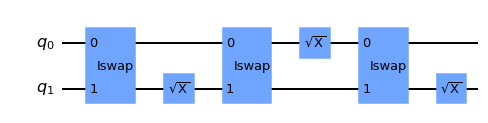

In [5]:
qc = QuantumCircuit(2)
qc.iswap(0,1)
qc.sx(1)
qc.iswap(0,1)
qc.sx(0)
qc.iswap(0,1)
qc.sx(1)
qc.draw(output='mpl')

In [8]:
Operator(qc).equiv(Operator(SwapGate()))

True

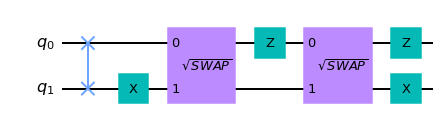

In [13]:
qc = QuantumCircuit(2)
qc.swap(0,1)
qc.x(1)
qc.append(rootSwap(), [0,1])
qc.z(0)
qc.append(rootSwap(), [0,1])
qc.z(0)
qc.x(1)
qc.draw(output='mpl')

In [15]:
Operator(qc).equiv(Operator(iSwapGate()))

False

In [2]:
theta = sympy.Symbol("theta")
RXGate

qiskit.circuit.library.standard_gates.rx.RXGate

In [60]:
class foo():
    def __init__(self):
        self.params = [sympy.Symbol("theta")]
foo.__array__ = RXGate.__array__.__get__(foo())
foo.__array__()

TypeError: can't convert expression to float

In [11]:
from inspect import getsource
import re

class SymbolicGate():
    def __init__(self):
        pass
        
    def eval(self, base, *symb):
        self.params = list(symb)
        function_string =  getsource(base.__array__)
        function_string = function_string.replace("return", "self._temp=")
        function_string = function_string.replace("math", "sympy")
        function_string = function_string.replace(", dtype=dtype", "")
        function_string = function_string.replace("dtype=dtype,", "")
        function_string = function_string.replace(".array", ".Matrix")
        function_string = function_string.replace("np.", "sympy.")
        function_string = function_string.replace("numpy", "sympy")
        function_formatted = ""
        for line in function_string.splitlines():
            if "def" in line:
                continue
            else:
                if "float" in line:
                    line = line.replace("float(", "")
                    line = line.replace(")", "")
                #shift over from class indentation
                function_formatted += line[8:]
                function_formatted += "\n"
        
        #function_formatted = "import sympy\n" + function_formatted
        exec(function_formatted, {"sympy":sympy, "numpy":np, "self":self})
        return self._temp


theta = sympy.Symbol("theta")
print(SymbolicGate().eval(RXGate, theta))
print(SymbolicGate().eval(RZGate, theta))

Matrix([[cos(theta/2), -1.0*I*sin(theta/2)], [-1.0*I*sin(theta/2), cos(theta/2)]])
Matrix([[exp(-0.5*I*theta), 0], [0, exp(0.5*I*theta)]])


In [8]:
yz= SymbolicGate().eval(RYGate, sympy.Symbol("t_y")) * SymbolicGate().eval(RZGate, sympy.Symbol("t_z"))
xyz = SymbolicGate().eval(RXGate, sympy.Symbol("t_x")) * yz
xyz

Matrix([
[-1.0*I*exp(-0.5*I*t_z)*sin(t_x/2)*sin(t_y/2) + exp(-0.5*I*t_z)*cos(t_x/2)*cos(t_y/2), -1.0*I*exp(0.5*I*t_z)*sin(t_x/2)*cos(t_y/2) - exp(0.5*I*t_z)*sin(t_y/2)*cos(t_x/2)],
[-1.0*I*exp(-0.5*I*t_z)*sin(t_x/2)*cos(t_y/2) + exp(-0.5*I*t_z)*sin(t_y/2)*cos(t_x/2),  1.0*I*exp(0.5*I*t_z)*sin(t_x/2)*sin(t_y/2) + exp(0.5*I*t_z)*cos(t_x/2)*cos(t_y/2)]])

In [12]:
SymbolicGate().eval(U3Gate, sympy.Symbol("f"), sympy.Symbol("g"), sympy.Symbol("h"))

"""Return a Numpy.Matrix for the U3 gate."""
theta, phi, lam = self.params
theta, phi, lam = theta, phi, lam
cos = sympy.cos(theta / 2)
sin = sympy.sin(theta / 2)
self._temp= sympy.Matrix(
    [
        [cos, -sympy.exp(1j * lam) * sin],
        [sympy.exp(1j * phi) * sin, sympy.exp(1j * (phi + lam)) * cos],
    ],
    dtype=dtype,
)



In [109]:
class foo():
    def __init__(self):
        self.bar = 0
        self.car = 1
    
    def foobar(self):
        temp = 2+2
        return self.bar + temp

In [140]:
import inspect
class wrap_foo(foo):
    def __init__(self):
        super().__init__()

    def foobar(self):
        a = inspect.getsource(foo.foobar)
        a = a.replace("self.bar", "self.car")
        a = a.replace("return", "self.ret_2=")
        #string parsing lol
        ret = ""
        for line in a.splitlines():
            if "def" in line:
                continue
            else:
                #shift over from inside class indentation
                ret += line[8:]
                ret +="\n"

        exec(ret, {"self": self})
        return self.ret_2

print(foo().foobar())
print(wrap_foo().foobar())

4
5


In [64]:
circuit = QuantumCircuit(1)
from qiskit.circuit import Parameter
theta = Parameter("theta")
circuit.rz(theta, 0)
Operator(circuit).data

TypeError: ParameterExpression with unbound parameters ({Parameter(theta)}) cannot be cast to a float.